In [1]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



In [2]:

problem_file = 'problem.json'
timelimit = 120

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

>>> Generating BIKE bundles ... (0.0077s)

Calculating BIKE bundles ...
[BIKE 1] 300 bundles (0.0060s)
[BIKE 2] 28801 bundles (2.7484s)
[BIKE 3] 386311 bundles (30.8881s)
[BIKE 4] 378667 bundles (72.4332s)
[BIKE 5] 18936 bundles (79.0216s)
[BIKE 6] 5 bundles (79.1977s)
>>> Total 813020 bundles of BIKE

>>> Generating WALK bundles ... (87.5225s)

Calculating WALK bundles ...
[WALK 1] 264 bundles (0.0031s)
[WALK 2] 317 bundles (0.5702s)
[WALK 3] 12 bundles (0.5783s)
>>> Total 593 bundles of WALK

>>> Generating CAR bundles ... (88.1066s)

Calculating CAR bundles ...
[CAR 1] 300 bundles (0.0023s)
[CAR 2] 13394 bundles (1.1885s)
[CAR 3] 39508 bundles (5.6219s)
[CAR 4] 4419 bundles (6.4393s)
[CAR 5] 14 bundles (6.4716s)
>>> Total 57635 bundles of CAR

>>> Total bundles generated: 871248 bundles (95.0625s)
>>> Formulating the Set Partitioning Problem ... (95.0626s)
Set parameter Username
Set parameter LicenseID to value 2597188
Academic license - for non-commercial use only - expires 2025-12

{'total_cost': 659225.4999999998,
 'avg_cost': 2197.4183333333326,
 'num_drivers': 111,
 'total_dist': 363722,
 'feasible': True,
 'infeasibility': None,
 'bundles': [['BIKE', [1, 142, 56], [56, 1, 142]],
  ['BIKE', [8, 11, 187], [11, 187, 8]],
  ['BIKE', [38, 136, 71], [71, 38, 136]],
  ['BIKE', [106, 69, 49], [69, 106, 49]],
  ['BIKE', [245, 100, 250], [245, 100, 250]],
  ['BIKE', [216, 259, 280], [216, 280, 259]],
  ['BIKE', [6, 27, 7, 0], [6, 0, 27, 7]],
  ['BIKE', [10, 36, 30, 23], [30, 10, 36, 23]],
  ['BIKE', [21, 12, 60, 43], [21, 43, 60, 12]],
  ['BIKE', [18, 15, 9, 141], [9, 18, 15, 141]],
  ['BIKE', [57, 59, 20, 90], [57, 59, 90, 20]],
  ['BIKE', [24, 192, 203, 172], [24, 192, 203, 172]],
  ['BIKE', [32, 185, 261, 279], [279, 32, 185, 261]],
  ['BIKE', [80, 39, 76, 86], [80, 39, 76, 86]],
  ['BIKE', [40, 72, 58, 178], [72, 58, 40, 178]],
  ['BIKE', [26, 55, 41, 116], [26, 55, 116, 41]],
  ['BIKE', [17, 4, 53, 66], [17, 4, 66, 53]],
  ['BIKE', [61, 173, 205, 218], [205, 173, 

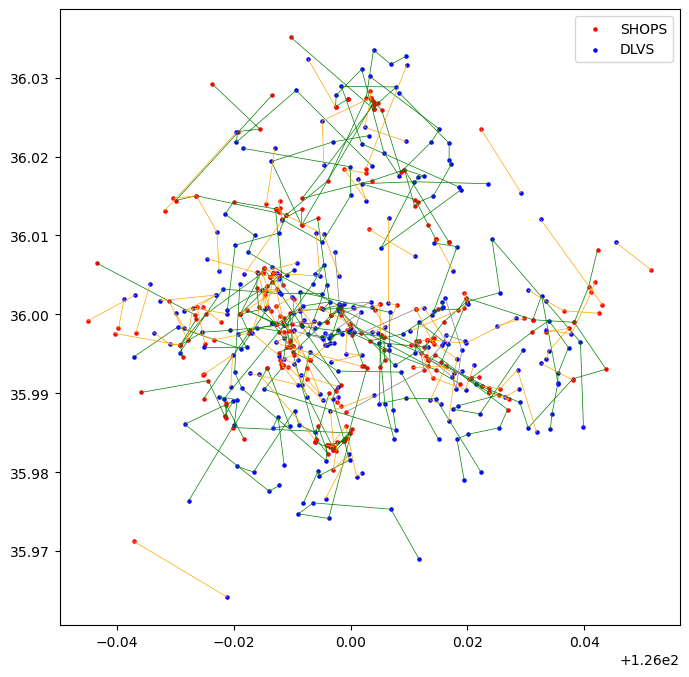

In [3]:
draw_route_solution(ALL_ORDERS, checked_solution)

In [ ]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)